In [17]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
import dotenv
dotenv.load_dotenv()
from langchain_google_genai import ChatGoogleGenerativeAI
from pydantic import BaseModel, Field


In [18]:
model = ChatGoogleGenerativeAI(
    model="gemini-2.5-pro",
)

In [19]:
class EvaluateEssay(TypedDict):
    essay: str
    launage_feedback: str
    analysis_feedback: str
    spelling_feedback: str
    clarity_feedback: str
    overall_feedback: str
    score: int
    avg_score: float
    final_summary: str

In [20]:
# def evalutation_score(state : EvaluateEssay) -> float:
#     output = model.invoke(
#         "Evaluate the following essay on a scale of 1 to 10 based on the provided feedbacks. Return only the numeric score.\n\n"
#         f"Essay: {state['essay']}\n"
#     )
#     return {'evalutation_score': output}

In [21]:
def launguage_feedback(state : EvaluateEssay) -> str:
    output = model.invoke(
    
        "Provide feedback on the language used in the following essay. Focus on grammar, vocabulary, and sentence structure.\n\n"
        f"Essay: {state['essay']}\n"
)
    return {'launage_feedback': output}

In [22]:
def analyatical_feedback(state : EvaluateEssay) -> str:
    output = model.invoke(
        "Provide detailed analytical feedback on the following essay focusing on structure, argument strength, and coherence.\n\n"
        f"Essay: {state['essay']}\n"
    )
    return {'analysis_feedback': output}

In [23]:
def spelling_feedback(state : EvaluateEssay) -> str:
    output = model.invoke(
        "Identify and correct any spelling mistakes in the following essay. Provide a list of corrections.\n\n"
        f"Essay: {state['essay']}\n"
    )
    return {'spelling_feedback': output}


In [24]:
def clarity_feedback(state : EvaluateEssay) -> str:
    output = model.invoke(
        "Provide clarity feedback on the following essay, focusing on grammar, punctuation, and readability.\n\n"
        f"Essay: {state['essay']}\n"
    )
    return {'clarity_feedback': output}

In [25]:
def overall_feedback(state : EvaluateEssay) -> str:
    output = model.invoke(
        "Provide overall feedback on the following essay, summarizing its strengths and areas for improvement.\n\n"
        f"Essay: {state['essay']}\n"
    )
    return {'overall_feedback': output}


In [26]:
def avg_score(state : EvaluateEssay) -> float:
    output = model.invoke(
        "Evaluate the following essay on a scale of 1 to 10 based on the provided feedbacks. Return only the numeric average score.\n\n"
        f"Essay: {state['essay']}\n"
    )
    return {'avg_score': float(output.strip())}


In [27]:
def final_summary(state : EvaluateEssay) -> str:
    prompt = (
        "Provide a final summary for the following essay, incorporating all feedback provided.\n\n"
        f"Essay: {state['essay']}\n"
        f"Essay Language Feedback: {state['launage_feedback']}\n"
        f"Essay Analysis Feedback: {state['analysis_feedback']}\n"
        f"Essay Spelling Feedback: {state['spelling_feedback']}\n"
        f"Essay Clarity Feedback: {state['clarity_feedback']}\n"
        f"Essay Overall Feedback: {state['overall_feedback']}\n"
    )
    output = model.invoke(prompt)
    state['final_summary'] = output
    

    return {'overall_feedback': overall_feedback, 'avg_score': state['avg_score']}

In [30]:
graph = StateGraph(EvaluateEssay)

# graph.add_node('evalutation_score', evalutation_score)
graph.add_node('analyatical_feedback', analyatical_feedback)
graph.add_node('spelling_feedback', spelling_feedback)
graph.add_node('clarity_feedback', clarity_feedback)
graph.add_node('avg_score', avg_score)
graph.add_node('final_summary', final_summary)

# graph.add_edge(START, 'evalutation_score')
graph.add_edge(START, 'analyatical_feedback')
graph.add_edge(START, 'spelling_feedback')
graph.add_edge(START, 'clarity_feedback')

# graph.add_edge('evalutation_score', final_summary)
graph.add_edge('analyatical_feedback', 'final_summary')
graph.add_edge('spelling_feedback', 'final_summary')
graph.add_edge('clarity_feedback', 'final_summary')
graph.add_edge('avg_score', 'final_summary')
# graph.add_edge(final_summary, END)
graph.add_edge('final_summary', END)


workflow = graph.compile()



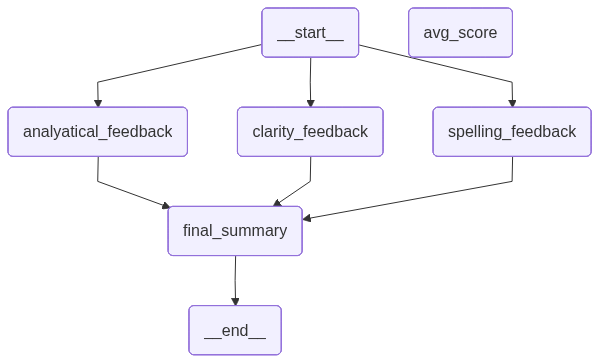

In [31]:
workflow

In [ ]:
essay2 = """India and AI Time

Now world change very fast because new tech call Artificial Intel… something (AI). India also want become big in this AI thing. If work hard, India can go top. But if no careful, India go back.

India have many good. We have smart student, many engine-ear, and good IT peoples. Big company like TCS, Infosys, Wipro already use AI. Government also do program “AI for All”. It want AI in farm, doctor place, school and transport.

In farm, AI help farmer know when to put seed, when rain come, how stop bug. In health, AI help doctor see sick early. In school, AI help student learn good. Government office use AI to find bad people and work fast.

But problem come also. First is many villager no have phone or internet. So AI not help them. Second, many people lose job because AI and machine do work. Poor people get more bad.

One more big problem is privacy. AI need big big data. Who take care? India still make data rule. If no strong rule, AI do bad.

India must all people together – govern, school, company and normal people. We teach AI and make sure AI not bad. Also talk to other country and learn from them.

If India use AI good way, we become strong, help poor and make better life. But if only rich use AI, and poor no get, then big bad thing happen.

So, in short, AI time in India have many hope and many danger. We must go right road. AI must help all people, not only some. Then India grow big and world say "good job India"."""

In [ ]:
intial_state = {
    'essay': essay2
}

workflow.invoke(intial_state)